### 구글드라이브 연동

In [15]:
# # 구글드라이브 연동
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

# # 구글 드라이브 파일 확인
# !ls '/gdrive/My Drive/temp/'

# # 반복되는 드라이브 경로 변수화
# drive_path = '/gdrive/My Drive/temp/'

### 머신러닝(Machine Learning) 종류

- 지도학습 (Supervised Learning)
- 비지도학습 (Unsupervised Learning)
- 강화학습 (Reinforcement Learning)
    - 강화학습의 좋은 예? : 알파고, 테슬라


지도학습 (Supervised Learning)

- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

- 분류(Classification)와 회귀(Regression)로 나뉘어진다.
> (ex. 스팸 메일 분류, 집 가격 예측, 손글씨 숫자 판별, 신용카드 의심거래 감지, 의료영상 이미지기반 종양판단)


비지도학습 (Unsupervised Learning)

- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.

- 데이터의 숨겨진 특징, 구조, 패턴 파악.

- 데이터를 비슷한 특성끼리 묶는 클러스터링(Clustering)과 차원축소(Dimensionality Reduction)등이 있다.
> (ex. 블로그 글 주제구분, 고객 취향별 그룹화, 웹사이트 비정상 접근 탐지, 이미지 감색 처리, 소비자 그룹 마케팅)

좋은 입력 데이터를 만들어내는 방법 -> 특성추출(특성공학)


강화학습 (Reinforcement Learning)

- 지도학습과 비슷하지만 완전한 답(Label)을 제공하지 않는 특징이 있다.

- 기계는 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습

> (ex. 게임이나 로봇 학습)


머신러닝 vs 딥러닝

|구분| Machine Learning| Deep Learning|
|---|---|---|
|훈련 데이터 크기| 작음| 큼|
|시스템 성능| 저 사양| 고 사양|
|feature 선택| 전문가 (사람) |알고리즘|
|feature 수| 많음 |적음|
|문제 해결 접근법| 문제를 분리 -> 각각 답을 얻음 -> 결과 통합| end-to-end (결과를 바로 얻음)|
|실행 시간| 짧음 |김|
|해석력 |해석 가능| 해석 어려움|

### [scikit-learn](https://scikit-learn.org/stable/index.html)

- 파이썬에 머신러닝 프레임워크 라이브러리

- 회귀, 분류, 군집, 차원축소, 특성공학, 전처리, 교차검증, 파이프라인 등 머신러닝에 필요한 기능 제공

- 학습을 위한 샘플 데이터 제공


#### scikit-learn으로 XOR 연산 학습해보기

XOR연산?

- 두값이 서로 같으면 0, 다르면 1  (배타적 논리 합)

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 1|
| 1| 0| 1|
| 1| 1| 0|


In [16]:
from sklearn import svm     # Support Vector Machine
import pandas as pd 

# XOR의 계산 결과 데이터 : convert table into 2-dimensional list.
xor_input = [ 
    # P, Q, R
    [0, 0, 0],
    [0, 1, 1], 
    [1, 0, 1], 
    [1, 1, 0],
]

# 학습을 위해 데이터와 레이블 분리하기 --- (※1) : Python 연습을 위해 list 그대로 분리해보자
xor_data = [xor_input_row[:2] for xor_input_row in xor_input]
xor_label = [xor_input_row[2:] for xor_input_row in xor_input]

# code example
xor_data, xor_label = [], []
for [p, q, r] in xor_input: 
    print(p, q, r)
    xor_data.append([p,q])
    xor_label.append(r)

# 데이터 학습시키기 --- (※2)
model = svm.SVC()
model.fit(xor_data, xor_label)      # 독립변수와 종속변수를 모두 넘겨주어야 한다.

# 데이터 예측하기 --- (※3)
pre = model.predict(xor_data)
print("data to predict : ", xor_data)
print("data predicted : ", pre)   

# 결과 확인하기 --- (※4)            # 결과값 산출하는 함수가 있으나 일일이 한번 시도
ok = 0
for idx, answer in enumerate(xor_label):
    p = pre[idx]
    if p == answer : ok += 1 

print(f"정답률 : {ok} / {4} = {ok/4}")

0 0 0
0 1 1
1 0 1
1 1 0
data to predict :  [[0, 0], [0, 1], [1, 0], [1, 1]]
data predicted :  [0 1 1 0]
정답률 : 4 / 4 = 1.0


In [17]:
# pandas 라이브러리를 사용하여 코드 간략화
import pandas as pd
from sklearn import svm, metrics    # metrics : 채점하는 모듈

# XOR 연산

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_input = pd.DataFrame([ 
    # P, Q, R
    [0, 0, 0],
    [0, 1, 1], 
    [1, 0, 1], 
    [1, 1, 0],
])

# X : P, Q and Y : R
xor_data = xor_input.iloc[:, :2]   # Problem to Solve
xor_label = xor_input.iloc[:, 2:]  # Answer

# 데이터 학습과 예측하기 --- (※2)
model = svm.SVC()
model.fit (xor_data, xor_label)
pre = model.predict(xor_data)

# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label, pre)
print(ac_score)

1.0


C:\Users\82102\.conda\envs\tf2_py38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
# KNN 분류 모델을 이용
# pandas 라이브러리를 사용하여 코드 간략화
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# XOR 연산

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_input = pd.DataFrame([ 
    # P, Q, R
    [0, 0, 0],
    [0, 1, 1], 
    [1, 0, 1], 
    [1, 1, 0],
])

# X : P, Q and Y : R
xor_data = xor_input.iloc[:, :2]   # Problem to Solve
xor_label = xor_input.iloc[:, 2:]  # Answer

# 데이터 학습과 예측하기 --- (※2)
model = KNeighborsClassifier(n_neighbors=1)     # hyper parameter에 유의
model.fit(xor_data, xor_label)
pre = model.predict(xor_data)

# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label, pre)
print(ac_score)

1.0


C:\Users\82102\.conda\envs\tf2_py38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


진행순서

>1. clf = 머신러닝모델 생성  # svm.SVC() or KNeighborsClassifier(n_neighbors=1) 
1. clf.fit(문제 , 답)
1. 예측결과 = clf.predict(값을 얻고 싶은 데이터 )
1. ac_score = metrics.accuracy_score(실제답, 예측결과)

clf (classifier) - scikit-learn 에서 [Estimator](https://en.wikipedia.org/wiki/Estimator) 인스턴스인 분류기를 지칭


[머신러닝 용어집](https://developers.google.com/machine-learning/glossary)

#### 모델 저장과 불러오기 - pickle

In [19]:
import pickle       # 일반적으로 파이썬 객체를 저장

# open close가 번거로우므로 with를 사용
with open('xor_model.pkl', 'wb') as f:    # txt가 아니라 binary이므로 w(rite)b(inary)
    pickle.dump(model, f)     # dump하려는 python 객체와 파일을 파라미터로 넘김

pre = model.predict([[0,0], [1,0]])     # 항상 list를 포함한 이차원 리스트가 되어야한다.

#### 모델 저장과 불러오기 - joblib

In [20]:
# from sklearn.externals import joblib. 이렇게 불러오면 해당 모듈을 찾을 수 없다고 에러가 뜬다.
import joblib    # 일반적으로 scikit learn 객체를 저장 / datatype 문제가 아니라 사용하기에 적절한 타입으로 이해하면 된다.

# 저장
joblib.dump(model, 'xor_model_2.pkl')   # model이름과 생성할 파일 이름을 각각 파라미터로 넘긴다. 

# 불러오기
joblib.load('xor_model_2.pkl')

KNeighborsClassifier(n_neighbors=1)

#### scikit-learn 연습 01

AND 연산 모델 작성

AND연산?

- 두값이 서로 참이면 1, 아니면 0 

|P(입력)| Q(입력)| R(출력)|
|---|---|---|
| 0| 0| 0|
| 0| 1| 0|
| 1| 0| 0|
| 1| 1| 1|

In [21]:
# KNN 분류 모델을 이용
import pandas as pd
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier

# AND 연산

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
# 데이터 학습과 예측하기 --- (※2)
# 정답률 구하기 --- (※3)

#### 분류? 회귀?

- 같은 종류의 꽃(붓꽃)을 세 품종 중 하나로 예측하는 것
- 이메일에서 스팸 메일을 예측하는 것
- 웹사이트의 글로부터 어떤 언어의 웹사이트인지 예측하는 것
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것
- 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 것
- 다음 학기 성적 점수를 예측하는 것
- 키와 몸무게를 가지고 비만도를 예측하는 것

#### scikit-learn 연습 02

비만도 데이터 학습

- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈


df = pd.read_csv('temp/bmi_500.csv', index_col = 'Label')   # index를 Label이라는 열로 변경
df.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


### EDA  : bmi

In [23]:
# data check : info로 전체적인 상황 파악

df.info()

# 1. 데이터 개수로 결측치 개수 확인
# 2. 데이터 타입 확인 (ex: object dtype은 label encoding해야 함 : 문자 to 숫자)
#       만약 남, 여를 0과 1로 변환한다고 하면 숫자가 큰 1인 여성이 더 큰 영향을 주게 된다.
#       이를 방지하기 위한 방법이 One-hot Encoding (특성 공학에서 보충)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [24]:
# label 종류 확인

df.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

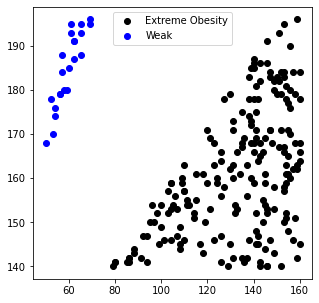

In [25]:
# 데이터가 섞인 정도 확인 (그룹화 하기 위해)

plt.figure(figsize=(5,5))   # create canvas

t = df.loc['Extreme Obesity']
w = df.loc['Weak']

# 데이터의 분포를 확인할 때 좋은 방법 : scatter
plt.scatter(t['Weight'], t['Height'], color='black', label="Extreme Obesity")   
plt.scatter(w['Weight'], w['Height'], color='blue', label="Weak")   

# label/범례를 표시하게 하는 명령어
plt.legend()

plt.show()

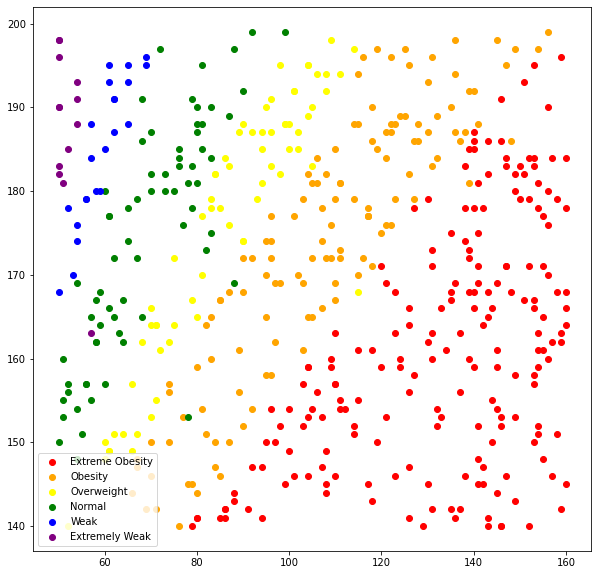

In [26]:
# 함수화

def scatter_plt(label, color):
    temp = df.loc[label]
    plt.scatter(temp['Weight'], temp['Height'], color=color, label=label)
    plt.legend()

plt.figure(figsize=(10,10))
scatter_plt('Extreme Obesity', 'red')
scatter_plt('Obesity', 'orange')
scatter_plt('Overweight', 'yellow')
scatter_plt('Normal', 'green')
scatter_plt('Weak', 'blue')
scatter_plt('Extremely Weak', 'purple')

plt.show()


모델링

1. 문제와 답으로 분리

2. 훈련셋과 평가셋으로 분리

3. 모델생성 및 하이퍼파라미터 조정

4. 학습 및 평가

In [27]:
# 데이터 분리
data = pd.read_csv('temp/bmi_500.csv')   # index를 Label이라는 열로 변경


# 2차원 행렬은 대문자, 1차원 행렬은 소문자로 표기하는 관례
X = data.loc[:, 'Height':'Weight']   # [열, 행]
y = data.loc[:, 'Label']    

# 형태 확인 : shape, pandas는 내부적으로 numpy를 사용하고 있기 때문에 유사하게 형태 파악 가능
print(X.shape)
print(y.shape)  

X_train = X.iloc[:350, :]
X_test = X.iloc[350:, :]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

(500, 2)
(500,)


In [29]:
bmi_model = KNeighborsClassifier(n_neighbors=10)    # defaults : 5
bmi_model.fit(X_train, y_train)
pred = bmi_model.predict(X_test)
metrics.accuracy_score(y_test, pred)     # metrics로 채점

0.9333333333333333

In [30]:
bmi_model.predict([ 
    [185, 43], [100, 20]
])

array(['Extremely Weak', 'Normal'], dtype=object)

### 머신러닝(Machine Learning) 진행 과정

1. ProblemIdentification (문제정의)
2. Data Collect(데이터 수집)
3. Data Preprocessing(데이터 전처리)
4. EDA(탐색적 데이터분석)
5. Model 선택, Hyper Parameter 조정
6. 학습
7. 모델 Evaluation(평가)


1. 문제정의
 - 지도학습 : 분류, 회귀
 - 비지도학습 : 군집, 차원축소
 - 강화학습

2. 데이터 수집
 - File Data, Database, 공공데이터, kaggle
 - Web Crawler (뉴스, SNS, 블로그)
 - IoT 센서를 통한 수집
	- 주로 자동차

3. 데이터 전처리
 - 결측치, 이상치 수정
 - Encoding : Categorical Data를 수치 데이터로 변경, 원핫인코딩
 - Feature Engineering (특성공학) : 단위 변환, 새로운 속성 추가 (MinMaxScaler, StandardScaler, RobustScaler)

4. EDA
 - 시각화를 통해 특성 선택 : (scatterplot, pairplot, boxplot, heatmap)
 - 사용할 Feature 선택 : 전처리 전략수립

5. Model 선택, Hyper Parameter 조정
 - 목적에 맞는 적절한 모델 선택
  - 지도학습
	 - 분류 : knn, Logistic Regression, SVM, Decision Tree, RandomForest, GradientBoosting
	 - 회귀 : knn, Linear Regression, Lasso, Ridge, Decision Tree, RandomForest, GradientBoosting
 - 하이퍼파라미터 튜닝

6. 학습
 - model.fit(X_train, y_train) : train 데이터와 test 데이터를 7:3 정도로 나눔 (train_test_split)
 - model.predict(X_test) :  (cross_val_score)

7. 평가
 -	지도학습
	 - 분류 : 정확도, 정밀도, 재현율, f1-score
	 - 회귀 : R^2, MSE, RMSE

 -	비지도학습
	- ARI 값